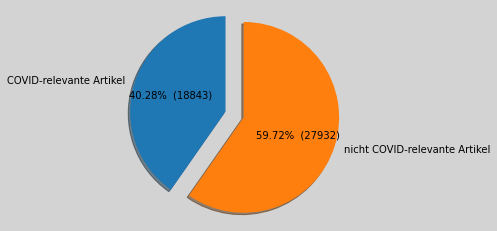

In [1]:
import matplotlib.pyplot as plt

labels = ["COVID-relevante Artikel", "nicht COVID-relevante Artikel"]

prozente = [18843, 46775-18843]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()





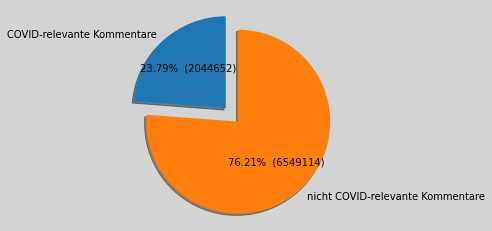

In [2]:
labels = ["COVID-relevante Kommentare", "nicht COVID-relevante Kommentare"]

prozente = [2044652, 8593766-2044652]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()

In [ ]:
from collections import Counter

meine_kommentare = Counter()


with open ("corona_relevante_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            meine_kommentare[line.split("\t")[4]] += 1
        except IndexError:
            pass

del meine_kommentare["None"]

anzahl = meine_kommentare.values()




In [5]:
# Zählt wie oft ein Kommentar von einem bestimmten User auf einer bestimmten Ebene auftaucht

from collections import defaultdict
node_counter = defaultdict(Counter)
names = [x[0] for x in meine_kommentare.most_common()[:20]]

with open ("corona_relevante_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[4] in names: 
                node_counter[line.split("\t")[4]].update(line.split("\t")[3])
        except IndexError:
            pass

print(node_counter)



defaultdict(<class 'collections.Counter'>, {'mhwse': Counter({'1': 2089, '3': 1582, '2': 1493, '0': 670}), 'Torben-k7b2MJlWR': Counter({'2': 3076, '1': 2784, '3': 2714, '0': 263}), 'HolgerHamburgo': Counter({'1': 2065, '3': 1880, '0': 1367, '2': 1346}), 'Karl-tBDI7C7ZR': Counter({'3': 2052, '2': 1732, '1': 1517, '0': 712}), 'Alwin-hVe4_eMMg': Counter({'1': 3976, '3': 3799, '2': 1136, '0': 178}), 'Knutie': Counter({'3': 6753, '1': 2537, '2': 2160, '0': 24}), 'Jürgen-UYQ1UxHMg': Counter({'1': 2240, '3': 1918, '2': 1165, '0': 109}), 'Engineer': Counter({'3': 1966, '1': 1900, '2': 1472, '0': 384}), 'iris_b': Counter({'3': 7879, '1': 5956, '2': 3852, '0': 1520}), 'Ro_Laren': Counter({'3': 2508, '1': 1372, '2': 1125, '0': 572}), 'Alex-jFlznaUWR': Counter({'1': 2590, '3': 1984, '2': 1216, '0': 227}), 'Tullius': Counter({'3': 8718, '1': 5598, '2': 3595, '0': 1355}), 'HeiterbisWolkig': Counter({'3': 6869, '1': 2675, '2': 1694, '0': 38}), 'Jürgen-SzIee4RMg': Counter({'3': 3869, '1': 3290, '2': 2

In [6]:
# Zählt die Monate der Kommentare, in welchem Monat wurde der Kommentar verfasst und speichert im Dicionary
MonthCounterCOVID = defaultdict(Counter)
MonthCounterNOCOV = defaultdict(Counter)
monthDict={"01":'Jan', "02":'Feb', "03":'Mar', "04":'Apr', "05":'May', "06":'Jun', "07":'Jul', "08":'Aug', "09":'Sep', "10":'Oct', "11":'Nov', "12":'Dec'}
covid_ids = set()

with open ("corona_relevante_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            covid_ids.add(line.split("\t")[0])
            MonthCounterCOVID[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
            #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass



MonthCounterCOVID



defaultdict(collections.Counter,
            {'20': Counter({'Mar': 99183,
                      'Apr': 156602,
                      'May': 114948,
                      'Jun': 58923,
                      'Jul': 56837,
                      'Aug': 86039,
                      'Sep': 52441,
                      'Oct': 127308,
                      'Nov': 126481,
                      'Dec': 162933,
                      'Feb': 13182,
                      'Jan': 1766}),
             '21': Counter({'Feb': 146887,
                      'Jul': 88865,
                      'Jan': 201770,
                      'Jun': 95462,
                      'Mar': 183305,
                      'Apr': 163084,
                      'May': 106470})})

In [7]:
import pandas as pd
Months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Comment_number_by_month = []
years = []
months = []
for i in range(len(MonthCounterCOVID["20"].values())):
    years.append("20")

for i in range(len(MonthCounterCOVID["21"].values())):
    years.append("21")

for year in MonthCounterCOVID.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month.append(MonthCounterCOVID[year][Months_order[i]])

months.extend(Months_order)
months.extend(Months_order[:7])

del Comment_number_by_month[-5:]

print(Comment_number_by_month)
print(len(months))
print(len(years))
DF_months = pd.DataFrame({"Year": years, "Month": months, "COVID": Comment_number_by_month})

DF_months

[1766, 13182, 99183, 156602, 114948, 58923, 56837, 86039, 52441, 127308, 126481, 162933, 201770, 146887, 183305, 163084, 106470, 95462, 88865]
19
19


,Year,Month,COVID
0,20,Jan,1766
1,20,Feb,13182
2,20,Mar,99183
3,20,Apr,156602
4,20,May,114948
5,20,Jun,58923
6,20,Jul,56837
7,20,Aug,86039
8,20,Sep,52441
9,20,Oct,127308


In [9]:
with open ("alle_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[0] not in covid_ids:
                MonthCounterNOCOV[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
                #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass

MonthCounterNOCOV.items()

dict_items([('20', Counter({'Sep': 345728, 'Nov': 338839, 'Dec': 332476, 'Aug': 321061, 'Oct': 318162, 'Jul': 300807, 'Jun': 241689, 'May': 220849, 'Apr': 156459, 'Feb': 141978, 'Mar': 135286, 'Jan': 66132})), ('21', Counter({'Apr': 443569, 'Mar': 429417, 'Jun': 404149, 'May': 395213, 'Jan': 388380, 'Feb': 350296, 'Jul': 252809, 'Aug': 3}))])

In [ ]:
Comment_number_by_month_nocov = []
for year in MonthCounterNOCOV.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month_nocov.append(MonthCounterNOCOV[year][Months_order[i]])
del Comment_number_by_month_nocov[-5:]

DF_months.insert(3, "No COVID", Comment_number_by_month_nocov)



In [12]:
DF_months

,Year,Month,COVID,No COVID
0,20,Jan,1766,66132
1,20,Feb,13182,141978
2,20,Mar,99183,135286
3,20,Apr,156602,156459
4,20,May,114948,220849
5,20,Jun,58923,241689
6,20,Jul,56837,300807
7,20,Aug,86039,321061
8,20,Sep,52441,345728
9,20,Oct,127308,318162


Text(0, 0.5, 'Number of comments')

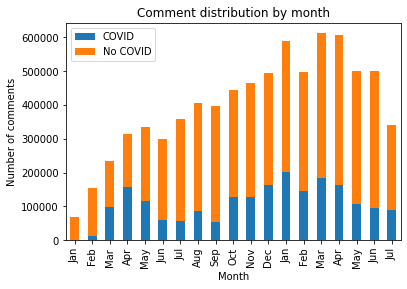

In [13]:
ax = DF_months.plot(kind ="bar",stacked = True, title="Comment distribution by month")
ax.set_xticklabels(DF_months.Month)
ax.set_xlabel("Month")
ax.set_ylabel("Number of comments")

In [ ]:
import pandas as pd

,Names,Zeros,Ones,Twos,Threes
11,Tullius,1355,5598,3595,8718
8,iris_b,1520,5956,3852,7879
14,No_Retreat_No_Surrender,408,4097,2385,8181
15,knielang,3700,5164,2233,1924
5,Knutie,24,2537,2160,6753
12,HeiterbisWolkig,38,2675,1694,6869
13,Jürgen-SzIee4RMg,196,3290,2109,3869
4,Alwin-hVe4_eMMg,178,3976,1136,3799
1,Torben-k7b2MJlWR,263,2784,3076,2714
18,Neve,68,2602,1534,3096


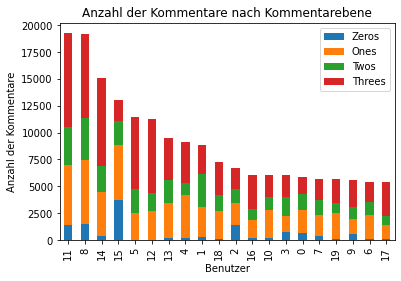

In [14]:
new_names = [x[0] for x in node_counter.items()]
zeros = [x[1]["0"] for x in node_counter.items()]
ones = [x[1]["1"] for x in node_counter.items()]
twos = [x[1]["2"] for x in node_counter.items()]
threes = [x[1]["3"] for x in node_counter.items()]
summe = [a + b +c + d for a,b,c,d in zip(zeros, ones, twos, threes) ]

df = pd.DataFrame({"Names": new_names, "Zeros": zeros, "Ones": ones, "Twos": twos, "Threes": threes, "Sum": summe})

df = df.sort_values("Sum", ascending= False)



del df["Sum"]

ax = df.plot(kind ="bar", stacked = True, title="Anzahl der Kommentare nach Kommentarebene")
ax.set_xlabel("Benutzer")
ax.set_ylabel("Anzahl der Kommentare")

df


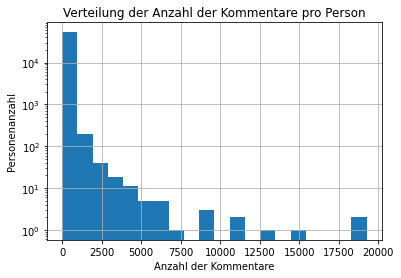

In [15]:
values = meine_kommentare.values()
n, bins, patches = plt.hist(values, bins=20)

plt.xlabel('Anzahl der Kommentare')
plt.ylabel('Personenanzahl')
plt.yscale("log")
plt.title('Verteilung der Anzahl der Kommentare pro Person')
plt.grid(True)
plt.show()

In [16]:
top20 = meine_kommentare.most_common(20)
namen, kommentare = zip(*top20)



In [17]:
import statistics

kommentaremedian = statistics.median(anzahl)
print(f"Median:{kommentaremedian}")
print(f"Mean {statistics.mean(anzahl)}")

Median:3.0
Mean 37.39085750789118


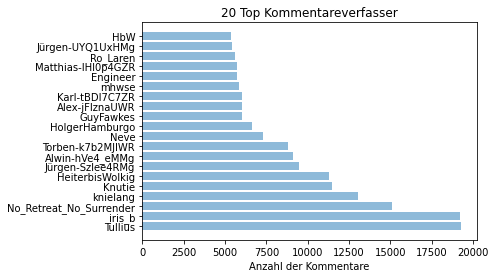

In [18]:
import numpy as np

y_pos = np.arange(len(namen))

plt.barh(y_pos, kommentare, align="center", alpha=0.5)
plt.yticks(y_pos, namen)
plt.xlabel("Anzahl der Kommentare")
plt.title("20 Top Kommentareverfasser")

plt.show()

In [19]:
statistics.mean(kommentare)

9118.8

In [1]:
# Für einen bestimmten User die Kommentare auslesen. NACHTRAG: War nicht mehr für die Arbeit direkt relevant

def create_user_comments_txt(username: str):

    annotierkommentare = []

    with open ("corona_relevante_kommentare.txt", mode = "r+", encoding="utf-8") as f:
        for line in f:
            try:
                if line.split("\t")[4] == username and line.split("\t")[3] == "0":
                    annotierkommentare.append((line.split("\t")[5], line.split("\t")[1]))
            except IndexError:
                pass

    länge = len(annotierkommentare)

    neuesten_10 = annotierkommentare[:10]
    mittel_10 = annotierkommentare[(länge//2):(länge//2+10)]
    alte_10 = annotierkommentare[-10:]


    with open (username + "_alte_10"  + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in alte_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    
    with open (username + "_mittel_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in mittel_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")

    with open (username + "_neuesten_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in neuesten_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    

In [ ]:
#create_user_comments_txt("knielang")
#create_user_comments_txt('Rainer-ppN5YarZg')
create_user_comments_txt('Elektromotor')

In [20]:
### Shows amount of 0 level comments in covid textfile
test = 0
with open ("corona_relevante_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[3] == "0":
                test += 1
        except IndexError:
            pass
print(test)

460853


In [21]:
list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


'Elektromotor'

In [22]:
sortierte_values = list(meine_kommentare.values())

sortierte_values.sort()

In [2]:
## Annotation loop for adding data to the training file, write exit to stop 

import webbrowser


annotated_data = []
already_present_data = 0

try:
    with open("annotated_data/annotated_data_training.txt", encoding="utf-8", mode="r+") as y:
        for line in y.readlines():
            if line != "\n":
                already_present_data += 1
except FileNotFoundError:
    already_present_data = 1

print(already_present_data)

with open ("annotated_data/shuffled_corona_relevante_kommentare.txt", encoding="utf-8", mode = "r+") as f:
    done = False
    while done == False:
        for line in f.readlines()[already_present_data-1:]:
            webbrowser.open("https://www.spiegel.de/politik/deutschland/fdp-und-corona-und-pandemie-die-lange-reise-in-die-wirklichkeit-a-" + line.split("\t")[0])
            kommentar = line.split("\t")[5]
            artikel_id = line.split("\t")[0]

            opinion = input(f"Opinion --- {kommentar}")

            while opinion not in ["neutral", "positive", "negative", "exit"]:
                opinion = input(f"Opinion --- {kommentar}")
            if opinion == "exit":
                with open ("annotated_data/annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
                    for line in annotated_data:
                        x.write(line+"\n")
                        done = True
                annotated_data = []
                break
            
            sentiment = input(f"Sentiment --- {kommentar}")

            
            while sentiment not in ["neutral", "positive", "negative"]:
                sentiment = input(f"Sentiment --- {kommentar}")

            
            klasse1 = input(f"Thema Person --- {kommentar}")

            klasse2 = input(f"Thema Artikel")

            annotated_data.append(line.split("\t")[0] + "\t" + line.split("\t")[1] + "\t" + line.split("\t")[2] + "\t" + line.split("\t")[3] + "\t" + line.split("\t")[4] + "\t" + opinion + "\t"
                                  + sentiment + "\t" + klasse1 + "\t" +  klasse2 + "\t" + kommentar + "\n")

        done = True

        klasse = ""
    with open ("annotated_data/annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
        for line in annotated_data:
            x.write(line+"\n")
   



1659


In [19]:
# Sorts out annotations with XXX as label
data = []

with open ("annotated_data/annotated_data_training.txt", encoding = "utf-8", mode ="r+") as f:
    for line in f.readlines():
        if len(line.split("\t")) >= 9:
            if line.split("\t")[7] == "XXX":
                pass
            else:
                data.append(line)

with open("annotated_data/cleaned_annotated_data_training.txt", encoding = "utf-8", mode ="w+") as f:
    for line in data:
        f.write(line)

len(data)

1200

Text(0, 0.5, 'Accuracy')

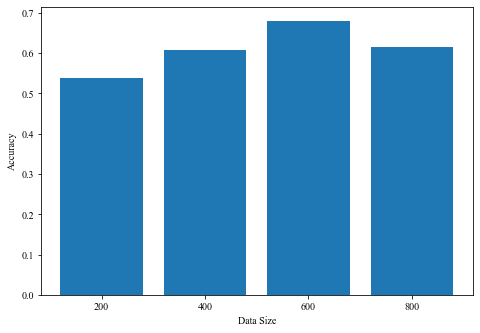

In [5]:
data_splits = ["200", "400", "600", "800"]

accuracies = [0.5384615384615384, 0.6075949367088608, 0.680672268907563, 0.6153846153846154]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_splits, accuracies)
ax.set_xlabel("Data Size")
ax.set_ylabel("Accuracy")


[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4)]


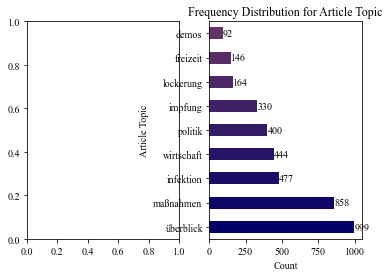

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4)]


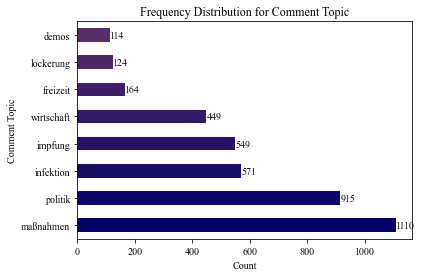

In [6]:
# from turtle import color
# from unicodedata import name
# import matplotlib.pyplot as plt
# import pandas as pd
# topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
# my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
# print(my_colors)
# plt.subplots(1,2)
 
# ax = topic_dataset["Topic_article"].value_counts().plot(kind="barh", color=my_colors)
# plt.xlabel("Count")
# plt.ylabel("Article Topic")

# for p in ax.containers:
#     ax.bar_label(p, fmt="%.0f")

# plt.title("Frequency Distribution for Article Topic")
# plt.show()

# ######
# my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
# print(my_colors)
# ax = topic_dataset["topic_comment"].value_counts().plot(kind="barh", color=my_colors)
# plt.xlabel("Count")
# plt.ylabel("Comment Topic")

# for p in ax.containers:
#     ax.bar_label(p, fmt="%.0f")

# plt.title("Frequency Distribution for Comment Topic")
# plt.show()

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4)]
[999 858 477 444 400 330 310  92] xxxx
[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4)]


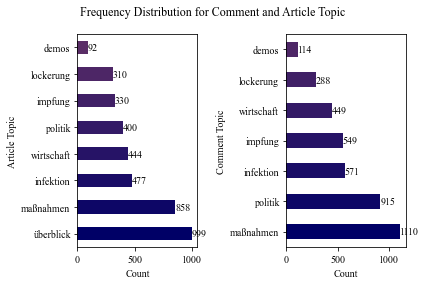

In [7]:
### Topic Graphs
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check_final_topics.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
print(my_colors)
fig, axs = plt.subplots(1,2)

daten = topic_dataset["Topic_article"].value_counts()

topic_dataset["Topic_article"].value_counts().plot(ax=axs[0], kind="barh", color=my_colors)

plt.ylabel("Article Topic")
print(daten.values, "xxxx")



axs.flat[0].set(ylabel="Article Topic", xlabel = "Count")
axs.flat[1].set(ylabel="Comment Topic", xlabel = "Count")

my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["topic_comment"].value_counts()))]
print(my_colors)
topic_dataset["topic_comment"].value_counts().plot(ax=axs[1], kind="barh", color=my_colors)

for plotnumber in range(2):
    for p in axs.flat[plotnumber].containers:
        axs.flat[plotnumber].bar_label(p, fmt="%.0f")

fig.suptitle("Frequency Distribution for Comment and Article Topic")

plt.tight_layout()
plt.show()

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]
[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]


Text(0.5, 1.0, 'Top 10 User Frequency')

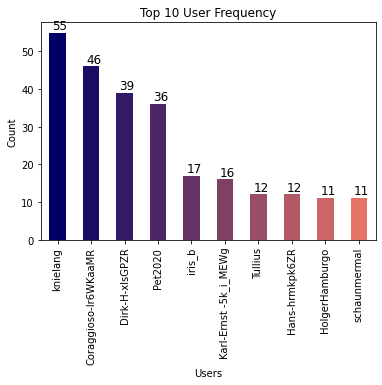

In [6]:
# Graph for User Frequency
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check_final_topics.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
ax= topic_dataset["Username"].value_counts()[:10].plot(kind="bar", color=my_colors)

my_colors = [(x/20, x/40, 0.4 ) for x in range(10)]
print(my_colors)



print(my_colors)
for bar in ax.patches:
    ax.annotate(
        str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +1 ),
        fontsize = 12
    )
plt.xlabel("Users")
plt.ylabel("Count")
plt.title("Top 10 User Frequency")

### Extracting users with positive comments uttered
The goal now is to extract users who uttered a positive Sentiment for the majority of the comments annotated. Grouping the comments by Sentiment and by user, we can see that the user with the most reoccurences of positive Sentiment in the annotated comments has a total count of only 2 positive comments. This is the case for 8 users, but the total amount of comments annotated for the specific users differs from user to user. This is why the users with the highest proportion of positive Sentiment comments from their overall annotated comments have been chosen as positive users. For this case, two users with all annotated comments (two for each user) labled as positive and two users with 66% of all annotated comments (3 for each user) labled as positive have been identified as so-called positive users. With this approximation, the whole non-labled data set can be searched for 0-level comments from these specific users, automatically labeling them as positive comments. 

In [8]:
user_sentiment = topic_dataset[["Username", "Sentiment"]]
grouped = user_sentiment.groupby(["Sentiment", "Username"]).size()
user_positive = grouped["positive"].sort_values(ascending=False)[:10]
# grouped = user_sentiment.groupby("Username")
# grouped.count()
for user in user_positive.keys():
    print(user, "\t",user_positive[user], "\t", len(user_sentiment.loc[user_sentiment["Username"] == user]), user_positive[user]/len(user_sentiment.loc[user_sentiment["Username"] == user]))




the_hardest_part_is_over 	 2 	 3 0.6666666666666666
Dirk-H-xIsGPZR 	 2 	 39 0.05128205128205128
S.-y6s9a3wWR 	 2 	 6 0.3333333333333333
Stephan-wN4AzzeWR 	 2 	 5 0.4
DoktorM 	 2 	 2 1.0
Frietjoff 	 2 	 2 1.0
schaunmermal 	 2 	 11 0.18181818181818182
the_hardest_is_yet_to_come 	 2 	 3 0.6666666666666666
ray05 	 1 	 1 1.0
Rolf-mOxqBsEWg 	 1 	 2 0.5


We now identify all comments in the COVID related comments file where these Users appear and concatenate all of their comments together. For this approach of increasing sample size for the positive class, we take the first 100 comments from each user. This is output as a csv file.

In [9]:
alle_kommentare = pd.read_csv("annotated_data/shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Comment"], 
                                    delimiter="\t", index_col=False)


alle_kommentare_positive_users = alle_kommentare.loc[(alle_kommentare["Username"].isin(["the_hardest_part_is_over", "the_hardest_is_yet_to_come", "DoktorM", "Frietjoff"])) & (alle_kommentare["Comment Level"] == 0)]
alle_kommentare_positive_users

,ID,Date,Time,Comment Level,Username,Comment
278,8dfbb7a6-04f1-46ad-867c-73286076de2c,2021-04-30,12:54,0,Frietjoff,"»Die Sicherheit für Besucher, Künstler und Del..."
456,1b29b80e-3501-4314-971d-03caafde7102,2021-06-27,18:21,0,Frietjoff,"»Masken statt Einschränkungen, Impfungen statt..."
2141,45be58a2-6336-422b-9765-7b65306bd923,2020-04-19,11:10,0,DoktorM,Mit einer Containment Strategie wie ich sie vo...
4076,3912647d-9d06-469b-9613-4eaf8ec97b4f,2021-03-13,12:01,0,the_hardest_is_yet_to_come,Könnten wir nicht einfach alle Ledermasken tra...
4786,140f0a16-ce5f-4524-b8d5-97f3a2e1748b,2021-03-03,15:00,0,Frietjoff,"Der Nachschub ist ja das eine, aber dass das V..."
...,...,...,...,...,...,...
407528,0bb662ae-e79f-4215-aa04-21e9240a2806,2021-05-17,14:33,0,the_hardest_part_is_over,Gibt es eigentlich (analog zu Vaxzevria) auch ...
407791,032fea0e-8762-4693-83c4-3a2f90dbc33f,2020-10-21,17:40,0,Frietjoff,Ist doch logisch: wenn das Bußgeld nur einen B...
408464,818540c8-57c1-4fc4-a9d8-411889e50d6e,2021-04-02,10:49,0,the_hardest_is_yet_to_come,Aus hessenschau de: Der Physiker und Aerosol-...
408756,a7f6c3ed-d208-471f-9dc2-583a1b0d227e,2020-05-11,01:02,0,Frietjoff,»Klaus Pfeffer [...] fürchtet um den Ruf der K...


In [13]:
print(alle_kommentare_positive_users["Username"].value_counts())
frietjoff = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "Frietjoff"]
the_hardest_is_yet_to_come =  alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "the_hardest_is_yet_to_come"]
DoktorM = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "DoktorM"]
the_hardest_part_is_over = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "the_hardest_part_is_over"]

concat_positive_users = pd.concat([frietjoff[:100], the_hardest_is_yet_to_come[:100], DoktorM[:100], the_hardest_part_is_over[:100]])
concat_positive_users.to_csv("annotated_data/data_augment_400_positive.csv", index = False, encoding="utf-8")
concat_positive_users

Frietjoff                     343
the_hardest_is_yet_to_come    193
DoktorM                       167
the_hardest_part_is_over      130
Name: Username, dtype: int64


,ID,Date,Time,Comment Level,Username,Comment
1186,c62d3cef-e54b-4612-9f18-56dd39785e3a,2021-03-13,00:44,0,Frietjoff,Statt in den Joe Biden versprochenen 100 Tagen...
1592,5c91f154-64cc-4ac7-9ab1-576bbfbdd409,2020-11-01,14:12,0,Frietjoff,Die Eltern sollen weiter arbeiten können. Nur...
2680,869e1f82-3a10-415c-a01a-4173d8435773,2020-06-01,10:30,0,Frietjoff,"Ich verstehe überhaupt nicht, wie man das jetz..."
3827,3d627f77-84e2-4e94-bfd1-27e16f5fa78b,2021-07-13,15:30,0,Frietjoff,Nach dem vielen Hin und Her der letzten 15 Mon...
4063,443b6cb5-a6cd-4891-a94a-62176214ad00,2020-05-05,21:34,0,Frietjoff,"Im Moment ist es leider notwendig, Grundrechte..."
...,...,...,...,...,...,...
295259,a649e171-e22b-40e6-8e61-b53aff3806d4,2021-06-20,06:40,0,the_hardest_part_is_over,Kann ich besorgen. Jede Stückzahl. Noch nicht ...
299669,5641bbb0-10d2-47a8-b677-d42335fe7db1,2021-05-11,09:50,0,the_hardest_part_is_over,„Tausende“ Vordrängler sollten bei 1 Mio. Impf...
301306,83a0076e-b00f-471f-b987-6ea45101859e,2021-05-20,06:01,0,the_hardest_part_is_over,Halbierung der Fallzahlen in den letzten 10 Ta...
307865,0bb662ae-e79f-4215-aa04-21e9240a2806,2021-05-17,14:33,0,the_hardest_part_is_over,Gibt es eigentlich (analog zu Vaxzevria) auch ...


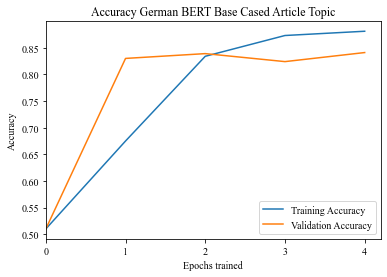

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
plt.plot([0,1,2,3,4],[0.51, 0.675, 0.834, 0.873,0.881], label='Training Accuracy')
plt.plot([0,1,2,3,4],[0.51, 0.830, 0.839, 0.824, 0.841], label='Validation Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs trained")
ax.set_title("Accuracy German BERT Base Cased Article Topic")
plt.legend()
plt.show() 

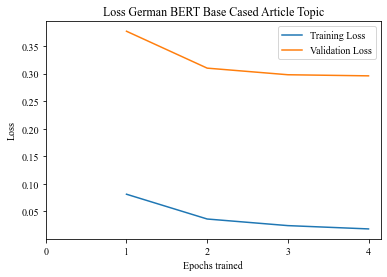

In [12]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4],[0.081 , 0.036, 0.024, 0.018], label='Training Loss')
plt.plot([1,2,3,4],[0.377 ,0.310, 0.298, 0.296], label='Validation Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs trained")
ax.set_title("Loss German BERT Base Cased Article Topic")
plt.legend()
plt.show() 

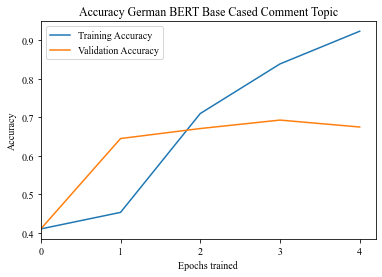

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
plt.plot([0,1,2,3,4],[0.41,  0.453, 0.710, 0.839,0.924], label='Training Accuracy')
plt.plot([0,1,2,3,4],[0.41, 0.645, 0.671, 0.693, 0.675], label='Validation Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs trained")
ax.set_title("Accuracy German BERT Base Cased Comment Topic")
plt.legend()
plt.show() 

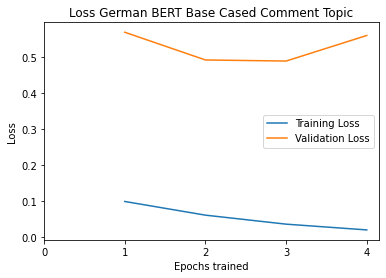

In [66]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4],[0.098 , 0.060, 0.035, 0.019], label='Training Loss')
plt.plot([1,2,3,4],[0.568 ,0.491, 0.488, 0.559], label='Validation Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs trained")
ax.set_title("Loss German BERT Base Cased Comment Topic")
plt.legend()
plt.show() 

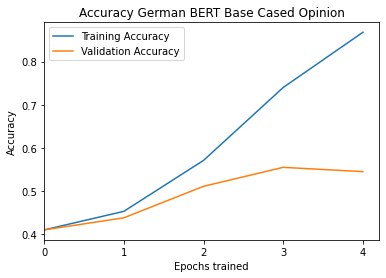

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
plt.plot([0,1,2,3,4],[0.41, 0.453, 0.571, 0.740, 0.868], label='Training Accuracy')
plt.plot([0,1,2,3,4],[0.41, 0.438, 0.511, 0.555, 0.545], label='Validation Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs trained")
ax.set_title("Accuracy German BERT Base Cased Opinion")
plt.legend()
plt.show() 

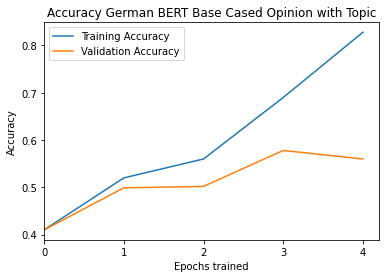

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
plt.plot([0,1,2,3,4],[0.41, 0.520, 0.560,0.690, 0.828], label='Training Accuracy')
plt.plot([0,1,2,3,4],[0.41, 0.499, 0.502, 0.578, 0.560], label='Validation Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs trained")
ax.set_title("Accuracy German BERT Base Cased Opinion with Topic")
plt.legend()
plt.show() 

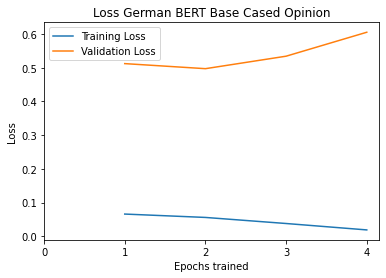

In [4]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4],[0.066 , 0.056,0.038, 0.019 ], label='Training Loss')
plt.plot([1,2,3,4],[0.512  , 0.497, 0.534, 0.605], label='Validation Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs trained")
ax.set_title("Loss German BERT Base Cased Opinion")
plt.legend()
plt.show() 

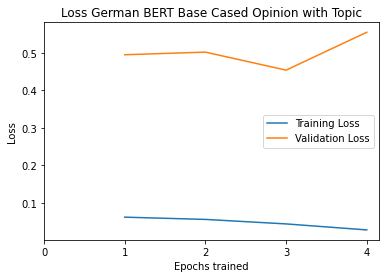

In [32]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4],[0.062  , 0.056,0.044, 0.028 ], label='Training Loss')
plt.plot([1,2,3,4],[0.495  , 0.502, 0.454 , 0.555], label='Validation Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs trained")
ax.set_title("Loss German BERT Base Cased Opinion with Topic")
plt.legend()
plt.show() 

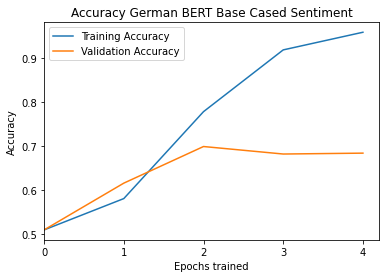

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
plt.plot([0,1,2,3,4],[0.51, 0.581 , 0.778 , 0.918, 0.958], label='Training Accuracy')
plt.plot([0,1,2,3,4],[0.51,0.616, 0.699, 0.682, 0.684], label='Validation Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs trained")
ax.set_title("Accuracy German BERT Base Cased Sentiment")
plt.legend()
plt.show() 

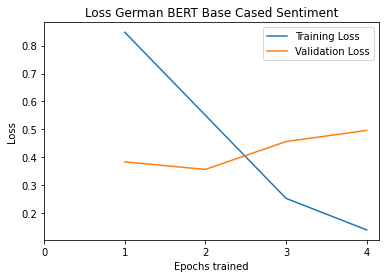

In [68]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4],[0.848 , 0.550, 0.252, 0.139 ], label='Training Loss')
plt.plot([1,2,3,4],[0.383  ,0.356, 0.456, 0.496], label='Validation Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(xmin=0)
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs trained")
ax.set_title("Loss German BERT Base Cased Sentiment")
plt.legend()
plt.show() 

Text(0.5, 1.0, 'Accuracy Topic Article by Topic BERT Base Cased')

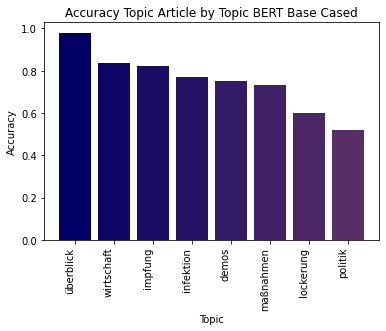

In [50]:
accuracies ={'lockerung': 0.6, 'überblick': 0.9797979797979798, 'politik': 0.5185185185185185, 'wirtschaft': 0.8378378378378378, 'impfung': 0.8227848101265823, 'demos': 0.75, 'infektion': 0.7692307692307693, 'maßnahmen': 0.7307692307692307}
accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Topic")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Topic Article by Topic BERT Base Cased")

Text(0.5, 1.0, 'Accuracy Topic Comment by Topic BERT Base Cased')

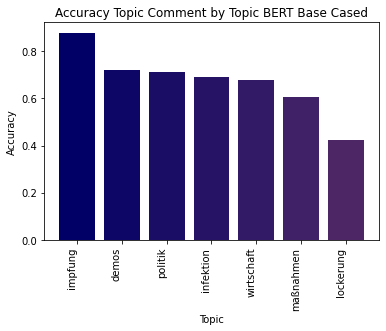

In [67]:
accuracies ={'lockerung': 0.423728813559322, 'infektion': 0.6909090909090909, 'wirtschaft': 0.6767676767676768, 'impfung': 0.8785046728971962, 'maßnahmen': 0.6060606060606061, 'politik': 0.7102272727272727, 'demos': 0.7222222222222222}
accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Topic")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Topic Comment by Topic BERT Base Cased")

Text(0.5, 1.0, 'Accuracy Sentiment BERT Base Cased')

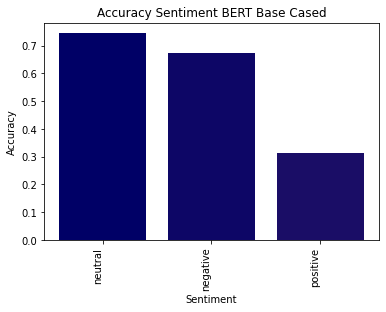

In [51]:
accuracies = {'negative': 0.6728232189973615, 'positive': 0.3125, 'neutral': 0.7455012853470437}
accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Sentiment")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Sentiment BERT Base Cased")

Text(0.5, 1.0, 'Accuracy Opinion BERT Base Cased')

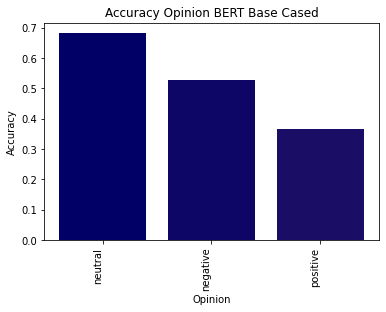

In [5]:
accuracies = {'negative': 0.5284810126582279, 'positive': 0.3657142857142857, 'neutral': 0.6828478964401294}
accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Opinion")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Opinion BERT Base Cased")


Text(0.5, 1.0, 'Accuracy Sentiment Augmentend 400 Positive BERT Base Cased')

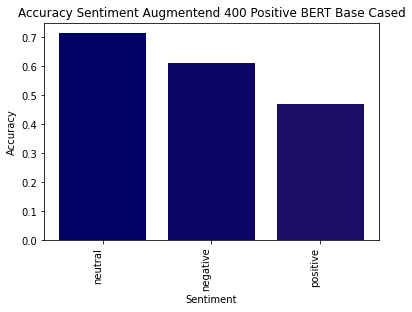

In [6]:
accuracies = {'negative': 0.6121372031662269, 'positive': 0.46875, 'neutral': 0.7146529562982005}

accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Sentiment")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Sentiment Augmentend 400 Positive BERT Base Cased")

In [ ]:
accuracies = {'negative': 0.6867088607594937, 'positive': 0.5371428571428571, 'neutral': 0.459546925566343}

accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}
topics = accuracies.keys()
values = accuracies.values()


fig, ax = plt.subplots()

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(accuracies))]
plt.bar(topics, values, color=my_colors)




plt.xlabel("Opinion")
plt.ylabel("Accuracy")
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Accuracy Opinion with Topic BERT Base Cased")

We now want to get the split for comment topic and sentiment by month so that we can predict for individual months, needed for last experiment in thesis

In [14]:
import pandas as pd
alle_kommis = pd.read_csv("annotated_data/shuffled_corona_relevante_kommentare.txt", delimiter="\t", names=["ID", "Date", "Time", "Comment Level", "Username", "Comment"])

alle_kommis["Date"] = pd.to_datetime(alle_kommis["Date"])
# alle_kommis.sort_values(by="Date", inplace=True)


alle_kommis["TimeLabel"] = pd.to_datetime(alle_kommis['Date']).dt.to_period('M')
# alle_kommis.query("TimeLabel == 2020").sample(n=10)

empty = pd.DataFrame()

for year in ["2020", "2021"]:
    for month in ["01", "02", "03", "04", "05", "06", "07" ,"08" ,"09 ","10", "11", "12"]:
        print(f"{year}-{month}")
        try:
            empty = empty.append(alle_kommis[alle_kommis.TimeLabel == f"{year}-{month}"].sample(100))
        except ValueError:
            break




2020-01
2020-02
2020-03
2020-04
2020-05
2020-06
2020-07
2020-08
2020-09 
2020-10
2020-11
2020-12
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08


In [23]:
empty.reset_index()
empty.to_csv("annotated_data/kommentare_over_time.csv", header=None, index=False)
empty

,ID,Date,Time,Comment Level,Username,Comment,TimeLabel
251357,aa09ad97-21e7-489b-a8e4-f98f21156037,2020-01-23,13:04,0,bammbamm,Ich kann mich nicht daran erinnern das es solc...,2020-01
104413,d020632f-7933-4e94-9120-d552787bfc97,2020-01-29,17:18,0,Michael Thomas-lewx5fMWR,Ohne die Video-Kolumnen von Harald Schmidt ist...,2020-01
358787,39a0e510-4a89-4871-8c08-675253f60f55,2020-01-29,18:34,0,Andreas-EzaPr7PWg,Zu 'Europa': Italien holt eigene Bürger ohne Q...,2020-01
125822,16505dcd-2af6-4edb-a042-4e4e7d70e384,2020-01-30,19:58,0,Lai-Q-zAhUyZg,"Ich bin Chinese, in Deutschland aufgewachsen. ...",2020-01
65076,17d70288-473e-47aa-845b-8968f33c8501,2020-01-29,10:32,0,kokodemokrat,"man könnte wohl sagen, es begann im Labor und ...",2020-01
...,...,...,...,...,...,...,...
287043,a90dee1b-dc58-449d-919a-0f3515ac0808,2021-07-03,13:44,0,Artificial_Stupidity,Das Erfolgskonzept von Luca ist die staatliche...,2021-07
320886,60ebaf08-9ef0-4bcd-90d7-2ee9e2d10158,2021-07-07,20:28,0,gfLwhB9Gg,Delta Variante? Nach Omega kommen die Zahlen d...,2021-07
367682,9766dd74-6a3e-4378-bc0c-db7d38bfc12c,2021-07-09,06:15,0,Wolfgang_2210,…wenn die Regierungslinie nur noch Beamte und ...,2021-07
386091,60ebaf08-9ef0-4bcd-90d7-2ee9e2d10158,2021-07-07,15:36,0,knielang,Portugal meldet 3.285 Neuinfektionen und 8 Tod...,2021-07


In [24]:
test = pd.read_csv("annotated_data/kommentare_over_time.csv")
test.columns= ("ID", "Date", "Time", "Comment Level", "Username", "Comment", "TimeLabel")
test

,ID,Date,Time,Comment Level,Username,Comment,TimeLabel
0,d020632f-7933-4e94-9120-d552787bfc97,2020-01-29,17:18,0,Michael Thomas-lewx5fMWR,Ohne die Video-Kolumnen von Harald Schmidt ist...,2020-01
1,39a0e510-4a89-4871-8c08-675253f60f55,2020-01-29,18:34,0,Andreas-EzaPr7PWg,Zu 'Europa': Italien holt eigene Bürger ohne Q...,2020-01
2,16505dcd-2af6-4edb-a042-4e4e7d70e384,2020-01-30,19:58,0,Lai-Q-zAhUyZg,"Ich bin Chinese, in Deutschland aufgewachsen. ...",2020-01
3,17d70288-473e-47aa-845b-8968f33c8501,2020-01-29,10:32,0,kokodemokrat,"man könnte wohl sagen, es begann im Labor und ...",2020-01
4,3bb0e4b8-19bb-4f6b-af02-800b64938952,2020-01-29,13:09,0,Peter-E_9gqGEZg,"Warum dauert so etwas überhaupt so lange, bis ...",2020-01
...,...,...,...,...,...,...,...
1894,a90dee1b-dc58-449d-919a-0f3515ac0808,2021-07-03,13:44,0,Artificial_Stupidity,Das Erfolgskonzept von Luca ist die staatliche...,2021-07
1895,60ebaf08-9ef0-4bcd-90d7-2ee9e2d10158,2021-07-07,20:28,0,gfLwhB9Gg,Delta Variante? Nach Omega kommen die Zahlen d...,2021-07
1896,9766dd74-6a3e-4378-bc0c-db7d38bfc12c,2021-07-09,06:15,0,Wolfgang_2210,…wenn die Regierungslinie nur noch Beamte und ...,2021-07
1897,60ebaf08-9ef0-4bcd-90d7-2ee9e2d10158,2021-07-07,15:36,0,knielang,Portugal meldet 3.285 Neuinfektionen und 8 Tod...,2021-07


In [19]:
import pandas as pd
mein_dataframe1 = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check_final_topics.csv", header=None, encoding="ISO-8859-1")
mein_dataframe1.columns = ["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment",
                          "topic_comment", "Topic_article", "Comment", "Method"]

mein_dataframe1["Comment"]  =mein_dataframe1["Comment"] + "[SEP] " + mein_dataframe1["topic_comment"]

mein_dataframe1.to_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check_pairs.csv", header=None, index=None)

For plotting the sentiment and comment topic predicted by the model

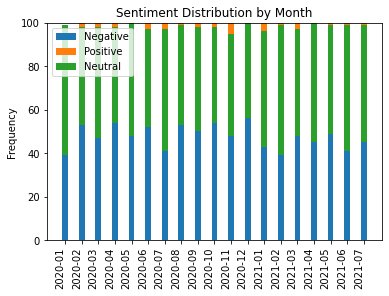

In [82]:
import matplotlib.pyplot as plt
predicted_sentiment = pd.read_csv("annotated_data/predicted_sentiment.csv", header=0, encoding="utf-8")
time  = predicted_sentiment["TimeLabel"].unique()
predictions = predicted_sentiment["PREDICTIONS"].unique()

test = predicted_sentiment.groupby(["TimeLabel", "PREDICTIONS"])["PREDICTIONS"].count().unstack(fill_value=0).stack()

labels = predicted_sentiment["TimeLabel"].unique()

width = 0.35 

count_negative = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "negative")]
count_positive = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "positive")]
count_neutral = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "neutral")]

fig, ax = plt.subplots()


ax.bar(labels, count_negative, width, label='Negative')
ax.bar(labels, count_positive, width, label='Positive', bottom=[x+y for x, y in zip(count_neutral, count_negative)])
ax.bar(labels, count_neutral, width, label='Neutral', bottom=count_negative)
ax.set_ylabel('Frequency')
ax.set_title('Sentiment Distribution by Month')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


[14, 14, 26, 23, 14, 21, 17, 21, 24, 34, 29, 22, 18, 19, 19, 25, 9, 18, 20]


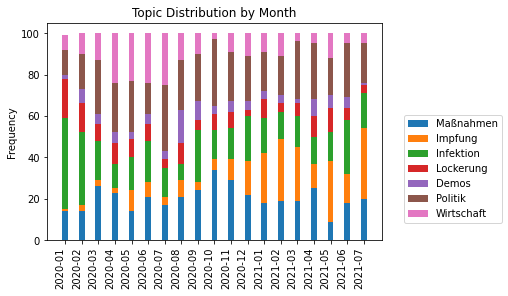

In [96]:
from itertools import count


predicted_sentiment = pd.read_csv("annotated_data/predicted_comment_topic.csv", header=0, encoding="utf-8")
time  = predicted_sentiment["TimeLabel"].unique()
predictions = predicted_sentiment["PREDICTIONS"].unique()

test = predicted_sentiment.groupby(["TimeLabel", "PREDICTIONS"])["PREDICTIONS"].count().unstack(fill_value=0).stack()

labels = predicted_sentiment["TimeLabel"].unique()

width = 0.35 

count_demos = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "demos")]
count_impfung = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "impfung")]
count_infektion = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "infektion")]
count_lockerung = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "lockerung")]
count_maßnahmen = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "maßnahmen")]
count_politik = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "politik")]
count_wirtschaft = [test[x] for id, x  in enumerate(test.index.values) if (test.index.values[id][1] == "wirtschaft")]


print(count_maßnahmen)
fig, ax = plt.subplots()


ax.bar(labels, count_maßnahmen, width, label='Maßnahmen')
ax.bar(labels, count_impfung, width, label='Impfung', bottom = count_maßnahmen)
ax.bar(labels, count_infektion, width, label='Infektion', bottom=[x+y for x, y in zip(count_maßnahmen, count_impfung)])
ax.bar(labels, count_lockerung, width, label='Lockerung', bottom=[x+y+z for x, y, z in zip(count_maßnahmen, count_impfung, count_infektion)])
ax.bar(labels, count_demos, width, label='Demos', bottom=[x+y+z+a for x, y, z, a in zip(count_maßnahmen, count_impfung, count_infektion, count_lockerung)])
ax.bar(labels, count_politik, width, label='Politik', bottom=[x+y+z+a+b for x, y, z, a, b in zip(count_maßnahmen, count_impfung, count_infektion, count_lockerung, count_demos)])
ax.bar(labels, count_wirtschaft, width, label='Wirtschaft', bottom=[x+y+z+a+b+c for x, y, z, a, b,c  in zip(count_maßnahmen, count_impfung, count_infektion, count_lockerung, count_demos, count_politik)])


ax.set_ylabel('Frequency')
ax.set_title('Topic Distribution by Month')
ax.legend(bbox_to_anchor = (1.05, 0.6))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()